In [1]:
import pandas as pd
import numpy as np
import sqlite3
import re
import string
import nltk 
nltk.download('punkt')


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
# !pip install tensorflow_addons 

In [3]:
def fetch_data(link):
        # Connect to the database file
    conn = sqlite3.connect(link)

    # Create a cursor object
    cursor = conn.cursor()

    # Get a list of all tables in the database
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
    tables = cursor.fetchall()

    # Print the list of tables
    print("Tables:")
    for table in tables:
        print(table[0])
        cursor.execute(f'SELECT * FROM {table[0]}')

    feats = pd.read_sql_query('SELECT * FROM id_text', conn)

    labels = pd.read_sql_query('SELECT * FROM id_dialect', conn)

    df_raw = pd.merge(feats, labels, on='id')

    return df_raw


    # Close the cursor and connection
    #cursor.close()
    #conn.close()

In [4]:
data=fetch_data('/kaggle/input/dialects-database/dialects_database.db')
data.head()

Tables:
id_text
id_dialect


,id,text,dialect
0,1009754958479151232,@toha_Altomy @gy_yah قليلين ادب ومنافقين. لو ا...,LY
1,1009794751548313600,@AlmFaisal 😂😂 الليبيين متقلبين!!!\nبس بالنسبة ...,LY
2,1019989115490787200,@smsm071990 @ALMOGRBE كل 20 تانيه شاب ليبي بير...,LY
3,1035479791758135168,@AboryPro @lyranoo85 رانيا عقليتك متخلفة. اولا...,LY
4,1035481122921164800,@lyranoo85 شكلك متعقدة علشان الراجل لي تحبيه ا...,LY


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147725 entries, 0 to 147724
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   id       147725 non-null  int64 
 1   text     147725 non-null  object
 2   dialect  147725 non-null  object
dtypes: int64(1), object(2)
memory usage: 4.5+ MB


In [6]:
data["dialect"].value_counts()

EG    57636
LY    36499
LB    27617
SD    14434
MA    11539
Name: dialect, dtype: int64

In [7]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', None)

## Clean Data

In [8]:
#preprocess 1
def remove_usrname(text):
    pattern=r'@\w+\s?'
    text=re.sub(pattern,' ',text)
    return text


def remove_english_nums(text):
        pattern=r'[a-zA-Z0-9#"]'
        text=re.sub(r"_+", " ", text)
        text=re.sub(r"\n+", " ", text)
        text=re.sub(pattern,' ',text)
        return text

def remove_punc(text):
    pattern=r'[^\w\s]'
    text=re.sub(pattern,' ',text)
    return text

def remove_extra_space(text):
    # Remove extra spaces
    text = re.sub('\s+', ' ', text)
    text = text.strip()
    return text



def remove_stopwords(text):
    # Tokenize the text into individual words
    words = nltk.word_tokenize(text)
    
    # Load the Arabic stopwords from the nltk library
    arabic_stopwords=set(nltk.corpus.stopwords.words('arabic'))
    
    # Remove the stopwords from the text
    filtered_words = [word for word in words if word not in arabic_stopwords]
    
    # Join the filtered words back into a string
    filtered_text = ' '.join(filtered_words)
    
    return filtered_text
#-----------------------------additional cleaning (did not use)--------------------------
def remove_non_arabic(text):
        pattern=r'[^\u0600-\u06FF\s]+'  
        text=re.sub(pattern,' ',text)
        return text
    
def remove_tashkeel (text):

    text = araby.strip_tashkeel(text)
    text=araby.normalize_ligature(text)

    # Normalize Unicode characters
    return text

def remove_laughs(text):
    text = re.sub(r'هه+','',text)
    return text


def remove_same_letters(preprocessed_text):
    preprocessed_text = re.sub("[إأآا]", "ا", preprocessed_text)
    preprocessed_text = re.sub("ى", "ي", preprocessed_text)
    preprocessed_text = re.sub("ؤ", "ء", preprocessed_text)
    preprocessed_text = re.sub("ئ", "ء", preprocessed_text)
    preprocessed_text = re.sub("ة", "ه", preprocessed_text)
    preprocessed_text = re.sub("گ", "ك", preprocessed_text)
    preprocessed_text = re.sub("ڤ", "ف", preprocessed_text)
    preprocessed_text = re.sub("چ", "ج", preprocessed_text)
    preprocessed_text = re.sub("ژ", "ز", preprocessed_text)
    preprocessed_text = re.sub("پ", "ب", preprocessed_text)
    
    return preprocessed_text


In [9]:
def wrangle(df):
    df=df.drop(columns="id")
    df["text"]=df["text"].apply(lambda x:remove_usrname(x))

    df["text"]=df["text"].apply(lambda x:remove_english_nums(x))

    df["text"]=df["text"].apply(lambda x:remove_punc(x))
    
    df["text"]=df["text"].apply(lambda x:remove_stopwords(x) )
    
    df["text"]=df["text"].apply(lambda x:remove_extra_space(x) )
    df["text"]=df["text"].astype(str)

    return df

In [10]:
df=wrangle(data)


In [48]:
data.loc[1],df.loc[1]

(id                                                               1009794751548313600
 text       @AlmFaisal 😂😂 الليبيين متقلبين!!!\nبس بالنسبة ليا انا ميليشياوي زمان وتوة
 dialect                                                                           LY
 Name: 1, dtype: object,
 text       الليبيين متقلبين بالنسبة ليا انا ميليشياوي زمان وتوة
 dialect                                                      LY
 Name: 1, dtype: object)

In [13]:
data.loc[8],df.loc[8]

(id                                                                          882943694906818560
 text       @muhamed01111 بالنسبة ليا انا والله شبعت هم ونكد وقتل ودم والحقد. الله يهدينا جميعا
 dialect                                                                                     LY
 Name: 8, dtype: object,
 text       بالنسبة ليا انا والله شبعت ونكد وقتل ودم والحقد الله يهدينا جميعا
 dialect                                                                   LY
 Name: 8, dtype: object)

----------------------------------------------------------------------------------------------------------------------------

### Splitting Data

In [14]:
import tensorflow as tf
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
import tensorflow_addons as tfa
from sklearn.model_selection import train_test_split
# from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
tf.random.set_seed(42)
nltk.download('punkt')


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


/opt/conda/lib/python3.10/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


True

In [15]:
target="dialect"

y=df[target]
# encoder=LabelEncoder()

encoder=OneHotEncoder()
y=encoder.fit_transform(np.array(y).reshape(-1, 1)).toarray()


X=df.drop(columns=target)

y.shape

(147725, 5)

# **Preprocess**

In [16]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42,shuffle=True)


In [17]:
#tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(list(X_train["text"])) #X_train only
# tokenizer.fit_on_texts(X_train)
train_sequences = tokenizer.texts_to_sequences(X_train["text"]) #X_train and X_test, remove the list
val_sequences = tokenizer.texts_to_sequences(X_val["text"])


In [18]:
#Padding
l=[]  #getting the avg length for tokens in list of tokens 
for sentence in train_sequences:
    l.append(len(sentence))

Text(0.5, 1.0, 'Max length for tokens')

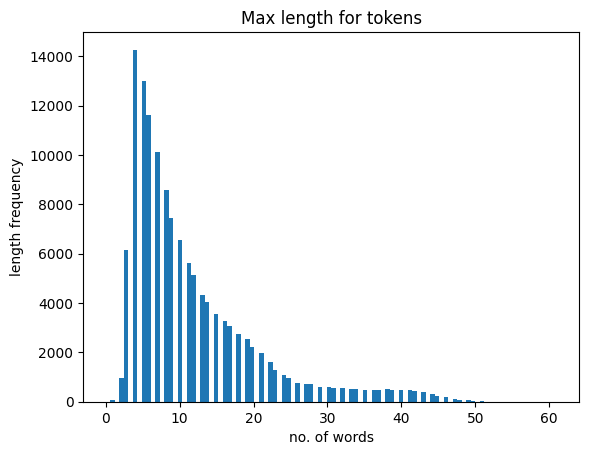

In [19]:
import matplotlib.pyplot as plt
plt.hist(l,bins=100)
plt.xlabel("no. of words")
plt.ylabel("length frequency")
plt.title("Max length for tokens")

In [20]:
# Pad sequences
maxlen = 55
#INPUT_LENGTH = MAX_SEQUENCE_LEN = max(len(sentence) for sentence in X_train)

X_train = pad_sequences(train_sequences, maxlen=maxlen)
X_val= pad_sequences(val_sequences, maxlen=maxlen)

In [21]:
X_train.shape, X_val.shape


((132952, 55), (14773, 55))

In [22]:
VOCAB_SIZE = (len(tokenizer.index_word)+1)//10

# **Modeling**

### Vanilla SimpleRNN

In [23]:
batch_size=640  #increase batch size ?? and try different optimizers
epochs=15
val=X_val.shape[0]//batch_size


In [24]:
model = tf.keras.models.Sequential([    
    tf.keras.layers.Embedding(VOCAB_SIZE, 64,input_length=maxlen),
#     tf.keras.layers.SimpleRNN(64,return_sequences=True),
    tf.keras.layers.SimpleRNN(64),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [25]:
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.003),
              metrics=['accuracy', tfa.metrics.F1Score(num_classes=5, average='macro')])

In [26]:


history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                    validation_data=(X_val, y_val), 
                    validation_steps=val)

Epoch 1/15
208/208 [==============================] - 47s 212ms/step - loss: 0.9012 - accuracy: 0.6557 - f1_score: 0.5637 - val_loss: 0.5943 - val_accuracy: 0.7921 - val_f1_score: 0.7417
Epoch 2/15
208/208 [==============================] - 34s 163ms/step - loss: 0.4530 - accuracy: 0.8439 - f1_score: 0.8024 - val_loss: 0.5670 - val_accuracy: 0.8018 - val_f1_score: 0.7563
Epoch 3/15
208/208 [==============================] - 26s 128ms/step - loss: 0.3020 - accuracy: 0.8975 - f1_score: 0.8727 - val_loss: 0.6404 - val_accuracy: 0.7914 - val_f1_score: 0.7476
Epoch 4/15
208/208 [==============================] - 22s 106ms/step - loss: 0.1833 - accuracy: 0.9400 - f1_score: 0.9277 - val_loss: 0.7519 - val_accuracy: 0.7808 - val_f1_score: 0.7365
Epoch 5/15
208/208 [==============================] - 21s 102ms/step - loss: 0.1277 - accuracy: 0.9576 - f1_score: 0.9500 - val_loss: 0.8960 - val_accuracy: 0.7741 - val_f1_score: 0.7306
Epoch 6/15
208/208 [==============================] - 20s 95ms/st

In [32]:
def Eval_model(model):
    loss,accuracy,fscore = model.evaluate(X_val, y_val)

    print('Test Loss: {}'.format(loss))
    print('Test F1_score: {}'.format(fscore))
    print('Test Accuracy: {}'.format(accuracy))

Eval_model(model)

462/462 [==============================] - 3s 7ms/step - loss: 1.5981 - accuracy: 0.7279 - f1_score: 0.6816
Test Loss: 1.5980658531188965
Test F1_score: 0.6815522909164429
Test Accuracy: 0.7278819680213928


### GRU

In [28]:
GRU = tf.keras.models.Sequential([    
    tf.keras.layers.Embedding(VOCAB_SIZE, 64,input_length=maxlen),
    tf.keras.layers.GRU(64),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [29]:
GRU.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.003),
              metrics=['accuracy',tfa.metrics.F1Score(num_classes=5, average='macro')])

In [33]:
history = GRU.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                    validation_data=(X_val, y_val), 
                    validation_steps=val)

Epoch 1/15
208/208 [==============================] - 25s 102ms/step - loss: 0.7628 - accuracy: 0.7112 - f1_score: 0.6385 - val_loss: 0.5278 - val_accuracy: 0.8105 - val_f1_score: 0.7709
Epoch 2/15
208/208 [==============================] - 15s 74ms/step - loss: 0.4109 - accuracy: 0.8557 - f1_score: 0.8239 - val_loss: 0.5210 - val_accuracy: 0.8184 - val_f1_score: 0.7823
Epoch 3/15
208/208 [==============================] - 11s 51ms/step - loss: 0.3228 - accuracy: 0.8875 - f1_score: 0.8657 - val_loss: 0.5633 - val_accuracy: 0.8054 - val_f1_score: 0.7666
Epoch 4/15
208/208 [==============================] - 8s 38ms/step - loss: 0.2637 - accuracy: 0.9085 - f1_score: 0.8921 - val_loss: 0.6247 - val_accuracy: 0.8027 - val_f1_score: 0.7635
Epoch 5/15
208/208 [==============================] - 8s 40ms/step - loss: 0.2176 - accuracy: 0.9239 - f1_score: 0.9105 - val_loss: 0.7002 - val_accuracy: 0.7935 - val_f1_score: 0.7543
Epoch 6/15
208/208 [==============================] - 7s 31ms/step - lo

In [34]:
Eval_model(GRU)

462/462 [==============================] - 2s 4ms/step - loss: 1.7369 - accuracy: 0.7755 - f1_score: 0.7335
Test Loss: 1.7368769645690918
Test F1_score: 0.733506977558136
Test Accuracy: 0.7754687666893005


### LSTM

In [35]:
LSTM = tf.keras.models.Sequential([    
    tf.keras.layers.Embedding(VOCAB_SIZE, 64,input_length=maxlen),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [36]:
LSTM.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.003),
              metrics=['accuracy', tfa.metrics.F1Score(num_classes=5, average='macro')])

In [37]:
history = LSTM.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                    validation_data=(X_val, y_val), 
                    validation_steps=val)

Epoch 1/15
208/208 [==============================] - 24s 105ms/step - loss: 0.7604 - accuracy: 0.7145 - f1_score: 0.6464 - val_loss: 0.5302 - val_accuracy: 0.8111 - val_f1_score: 0.7742
Epoch 2/15
208/208 [==============================] - 15s 72ms/step - loss: 0.4057 - accuracy: 0.8578 - f1_score: 0.8280 - val_loss: 0.5250 - val_accuracy: 0.8152 - val_f1_score: 0.7791
Epoch 3/15
208/208 [==============================] - 11s 54ms/step - loss: 0.3211 - accuracy: 0.8871 - f1_score: 0.8665 - val_loss: 0.5682 - val_accuracy: 0.8082 - val_f1_score: 0.7703
Epoch 4/15
208/208 [==============================] - 8s 38ms/step - loss: 0.2680 - accuracy: 0.9058 - f1_score: 0.8897 - val_loss: 0.6263 - val_accuracy: 0.8055 - val_f1_score: 0.7662
Epoch 5/15
208/208 [==============================] - 8s 38ms/step - loss: 0.2298 - accuracy: 0.9186 - f1_score: 0.9050 - val_loss: 0.6810 - val_accuracy: 0.7980 - val_f1_score: 0.7600
Epoch 6/15
208/208 [==============================] - 7s 32ms/step - lo

In [38]:
Eval_model(LSTM)

462/462 [==============================] - 2s 4ms/step - loss: 1.6257 - accuracy: 0.7844 - f1_score: 0.7432
Test Loss: 1.6257375478744507
Test F1_score: 0.7431802153587341
Test Accuracy: 0.7844039797782898


_______________________________________________________________________________

### after preprocessing and cleaning the text , LSTM and GRU had the highest scores 

##### 0.7844039797782898, 0.7754687666893005

